##Practical Statistics for Data Scientists - chapter-2 (Python)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import scipy
from scipy import stats

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
data = pd.read_csv('loans_income.csv')
data.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [3]:
data.describe()

,x
count,50000.00000
mean,68760.51844
std,32872.03537
min,4000.00000
25%,45000.00000
50%,62000.00000
75%,85000.00000
max,199000.00000


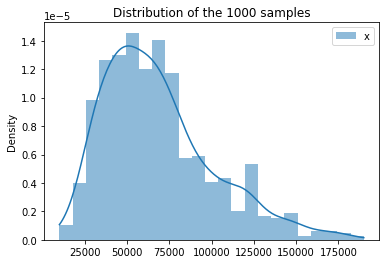

Mean  of the 1000 samples 68294.153


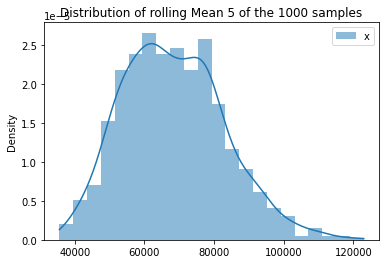

Mean  of rolling Mean 5 of the 1000 samples 68350.70702811239


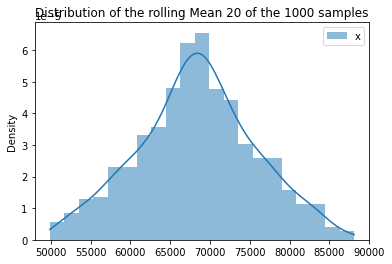

Mean  of rolling Mean 20 of the 1000 samples 68348.06870540285


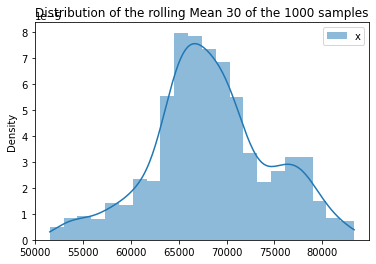

Mean  of rolling Mean 30 of the 1000 samples 68346.35750085821


In [4]:
# Take 1000 samples from the data which includes 50000. 
sample = data.sample(n=1000)

#Calculate rolling mean 5 and 20 of the samples, and drop all the items with missing data.
sample_mean_5 = sample.rolling(5).mean().dropna()
sample_mean_20 = sample.rolling(20).mean().dropna()
sample_mean_30 = sample.rolling(30).mean().dropna()

#Draw the histplot 
sns.histplot(sample,kde=True, stat="density", linewidth=0);
plt.title('Distribution of the 1000 samples')
plt.show()
print("Mean  of the 1000 samples", np.mean(sample['x']))

sns.histplot(sample_mean_5,kde=True, stat="density", linewidth=0)
plt.title('Distribution of rolling Mean 5 of the 1000 samples')
plt.show()
print("Mean  of rolling Mean 5 of the 1000 samples", np.mean(sample_mean_5['x']))

sns.histplot(sample_mean_20,kde=True, stat="density", linewidth=0)
plt.title('Distribution of the rolling Mean 20 of the 1000 samples')
plt.show()
print("Mean  of rolling Mean 20 of the 1000 samples", np.mean(sample_mean_20['x']))

sns.histplot(sample_mean_30,kde=True, stat="density", linewidth=0)
plt.title('Distribution of the rolling Mean 30 of the 1000 samples')
plt.show()
print("Mean  of rolling Mean 30 of the 1000 samples", np.mean(sample_mean_30['x']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

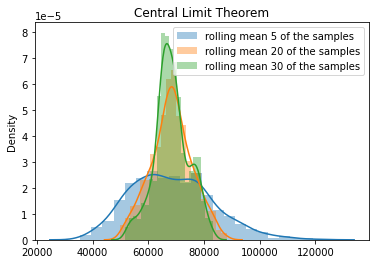

In [5]:
#Central Limit Theorem concept
sns.distplot(sample_mean_5,kde=True, label="rolling mean 5 of the samples")
sns.distplot(sample_mean_20,kde=True,label="rolling mean 20 of the samples")
sns.distplot(sample_mean_30,kde=True,label="rolling mean 30 of the samples")
plt.title('Central Limit Theorem')
plt.legend()
plt.show()
#Larger the sample, the narrower the distribution of the sample statistic

In [6]:
#Standard Error
data['x'].sem()

147.00821129152416

In [7]:
#Calculating a rolling mean:
print('Total Population STD : ',data.x.std())
print('Total Population Mean : ',data.x.mean())
print('Total Population Median : ',np.median(data.x))
print('Total Population Standard Error:',stats.sem(data.x, ddof=1))

Total Population STD :  32872.03536985002
Total Population Mean :  68760.51844
Total Population Median :  62000.0
Total Population Standard Error: 147.00821129152527


In [8]:
#Bootstrap method
from sklearn.utils import resample

results = []
for nrepeat in range(1000): 
    sample = resample(data)
    results.append(sample.median())
results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {data.mean()}')
print(f'bias: {results.mean() - data.mean()}')
print(f'std.error: {results.std()}')

Bootstrap Statistics:
original: x    68760.51844
dtype: float64
bias: x   -6837.78244
dtype: float64
std.error: 219.63547652086294


In [9]:
#Confidence Interval
sample_20 = data['x'].sample(20)
stats.t.interval(alpha=0.95, df= len(sample_20)-1, loc=np.mean(sample_20),scale=stats.sem(sample_20))

(58765.74921949852, 87996.05078050146)

In [10]:
np.random.seed(0)
sample_5000 = data['x'].sample(5000)
stats.norm.interval(alpha=0.95, loc=np.mean(sample_5000),scale=stats.sem(sample_5000))

(67948.22610645261, 69783.17869354738)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


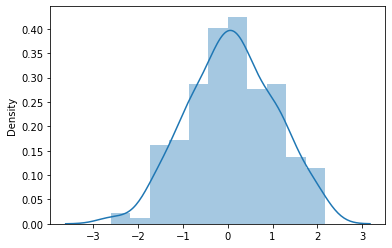

In [11]:
#Normal Distribution and QQ-Plots
#The package scipy has the function (stats.probplot) to create QQ-plots. 
#The argument dist specifies the distribution, which is set by default to the normal distribution.
test= np.random.normal(loc=0,scale=1, size=200)
sns.distplot(test)
plt.show()

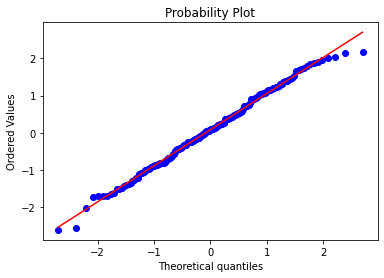

In [12]:
stats.probplot(test, dist="norm", plot=plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


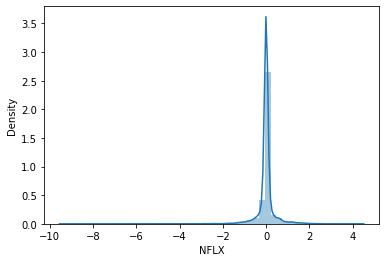

In [13]:
#Long -Tailed Distribution
nflx=pd.read_csv("sp500_data.csv.gz", index_col=0)
nflx_NFLX=nflx.NFLX
sns.distplot(nflx_NFLX)
plt.show()

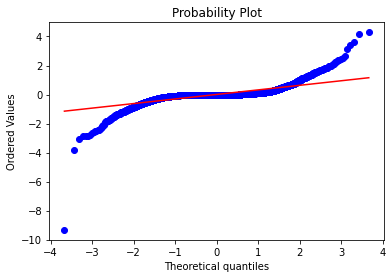

In [14]:
stats.probplot(nflx_NFLX,plot=plt,dist="norm")
plt.show()

In [15]:
#Binomial Distribution
#Example question: if the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?
import scipy
from scipy import stats
scipy.stats.binom.pmf(2, n = 5, p = 0.1)
scipy.stats.binom.cdf(2, n = 5, p = 0.1)

0.99144

In [16]:
# n times trails, each trial is p=0.4
n, p = 5, 0.4
k=2
mean, var, skew, kurt = stats.binom.stats(n, p, moments='mvsk')
print("mean: ",mean,"\nvar: ",var,"\nskew: ",skew,"\nkurt:",kurt)


b = stats.binom(5,0.1)
probability = b.pmf(2)

print("\nprobability of observing exactly x=2 successes in n=5 trails:", probability)

mean:  2.0 
var:  1.2 
skew:  0.18257418583505533 
kurt: -0.3666666666666668

probability of observing exactly x=2 successes in n=5 trails: 0.0729


Poisson Distribution: If incoming customer service calls average 2 per minute, 
 this code will simulate 100 minutes, returning the number bof calls in each of those 100 minutes.


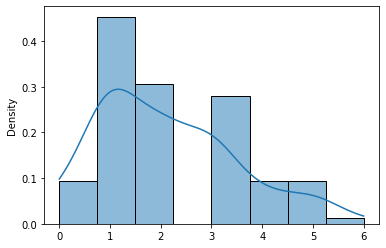

In [17]:
#Poisson and related distributions
poisson= scipy.stats.poisson.rvs(2, size = 100)
sns.histplot(poisson,kde=True,linewidth=1,stat="density")

print("Poisson Distribution: If incoming customer service calls average 2 per minute, \n this code will simulate 100 minutes, returning the number bof calls in each of those 100 minutes.")

Exponential Distrubution: Simulation of 100 intervals, in minutes, between service calls, 
where the average rate of incoming calls is 0.2 per minute.


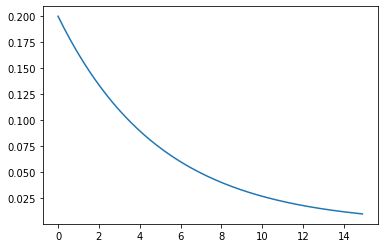

In [18]:
exponential= scipy.stats.expon.rvs(0.2, size = 100)
print("Exponential Distrubution: Simulation of 100 intervals, in minutes, between service calls, \nwhere the average rate of incoming calls is 0.2 per minute.")
lambd = 0.2
x = np.arange(0,15,0.1)
y = lambd*np.exp(-lambd*x)
plt.plot(x,y)
plt.show()

Weibull Distribution


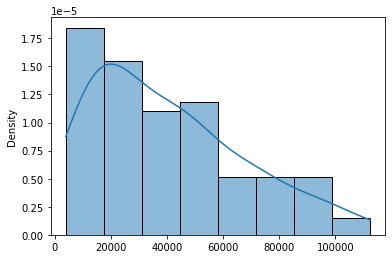

In [19]:
weibull = scipy.stats.weibull_min.rvs(1.5, scale = 50000, size = 100)
sns.histplot(weibull,kde=True,linewidth=1,stat="density")
print("Weibull Distribution")